In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


season_21 = pd.read_csv('data/pitches_21.csv')
season_22 = pd.read_csv('data/pitches_21.csv')
season_23 = pd.read_csv('data/pitches_21.csv')

In [2]:
season_21.columns

Index(['Unnamed: 0', 'gameid', 'GameDate', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name'],
      dtype='object')

In [3]:
season_22.dtypes

Unnamed: 0            int64
gameid               object
GameDate             object
ab                    int64
pitchnum              int64
inning              float64
teambat               int64
balls               float64
strikes             float64
outs                float64
pitcher              object
pitcherthrows        object
batter               object
batterside           object
pitchresult          object
pitchresult_desc     object
eventtype            object
pitchname            object
pitchname_desc       object
spinrate            float64
relspeed            float64
horzbreak           float64
inducedvertbreak    float64
platelocside        float64
platelocheight      float64
hometeam_id           int64
Home                 object
awayteam_id           int64
Visitor              object
venue_id              int64
venue_name           object
dtype: object

## Adding a Date and Time Column with datetime pandas objects 

In [4]:
season_21['GameDate'] = pd.to_datetime(season_21['GameDate'])
season_21['Date'] = season_21['GameDate'].dt.date
season_21['Time'] = season_21['GameDate'].dt.time

cols = list(season_21.columns)
# find index of GameDate
idx = cols.index('GameDate')
# Basically put Date and Time right next to GameDate 
new_cols = cols[:idx + 1] + ['Date', 'Time'] + cols[idx + 1:-2]

season_21 = season_21[new_cols].copy()
season_21

,Unnamed: 0,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,1,4.0,1,0.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,2,4.0,1,0.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,3,4.0,1,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,1,4.0,1,0.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,35,1,5.0,0,0.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,706905,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,42,8,5.0,1,0.0,...,12.777756,5.362740,-0.295482,2.166446,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706905,706906,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,1,5.0,1,0.0,...,7.615064,-0.164651,-0.438475,1.132619,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706906,706907,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,2,5.0,1,0.0,...,5.507193,14.064531,0.894155,2.744111,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706907,706908,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,3,5.0,1,1.0,...,5.922451,13.146690,0.216244,3.111117,144,Atlanta Braves,121,New York Mets,4705,Truist Park


## Sorting the DataFrame chronologically - then by Team Name, and then by "at bats"

In [5]:
season_21  = season_21.sort_values(by = ['Date', 'Home', 'ab'])
season_21 = season_21.drop(columns = ['Unnamed: 0'])
season_21
#season_21.to_csv('data/pitches.csv')



,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
104858,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,7.899302,20.196724,-0.925614,3.118610,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104859,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,3.684525,20.294086,-0.000916,1.945728,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104860,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,7.670026,18.184725,-1.969467,3.548406,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104861,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,7.343168,19.395239,-1.160865,2.435223,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104862,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,5.351965,17.362413,0.046086,2.654030,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563007,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,4,9.0,1,1.0,2.0,...,2.049364,18.104872,0.719018,2.699417,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
563008,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,5,9.0,1,1.0,2.0,...,-4.902229,-20.987835,0.399907,1.736541,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
563009,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,1,9.0,1,0.0,0.0,...,0.660327,19.385929,0.487332,2.043276,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
565478,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,2,9.0,1,0.0,1.0,...,0.548382,20.448322,0.333695,3.081872,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park


In [7]:
season_21 = season_21.sort_values(by=['gameid', 'ab', 'pitchnum'])

# Step 2: Identify strikeout events
strikeout_df = season_21[season_21['eventtype'] == 'strikeout']

# Step 3: For each strikeout, find the previous pitch (the one immediately before the strikeout)
# Create a new column that shifts the pitchname by 1 to represent the previous pitch
season_21['prev_pitchname'] = season_21['pitchname'].shift(1)

# Also shift other columns to ensure the previous pitch belongs to the same at-bat and game
season_21['prev_gameid'] = season_21['gameid'].shift(1)
season_21['prev_ab'] = season_21['ab'].shift(1)

# Step 4: Filter for pitches that are strikeouts and where the previous pitch is from the same game and at-bat
strikeout_with_prev_pitch = season_21[
    (season_21['eventtype'] == 'strikeout') &
    (season_21['gameid'] == season_21['prev_gameid']) &
    (season_21['ab'] == season_21['prev_ab'])
]

# Step 5: Group by the previous pitch and the strikeout pitch
pitch_pairs = strikeout_with_prev_pitch.groupby(
    ['prev_pitchname', 'pitchname']
).size().reset_index(name='count')

# Step 6: Sort the results by count to find the most common pitch pairs (previous and strikeout pitch)
most_common_pitch_pairs = pitch_pairs.sort_values(by='count', ascending=False)

# Step 7: Display the most common pitch pairs leading to strikeouts
print(most_common_pitch_pairs)
print(most_common_pitch_pairs.nunique())

   prev_pitchname pitchname  count
37             FF        FF   6483
83             SL        SL   4612
42             FF        SL   3424
78             SL        FF   2604
0              CH        CH   1614
..            ...       ...    ...
57             KC        CU      1
54             FT        FT      1
74             SL        CS      1
76             SL        FA      1
80             SL        FT      1

[84 rows x 3 columns]
prev_pitchname    12
pitchname         12
count             62
dtype: int64


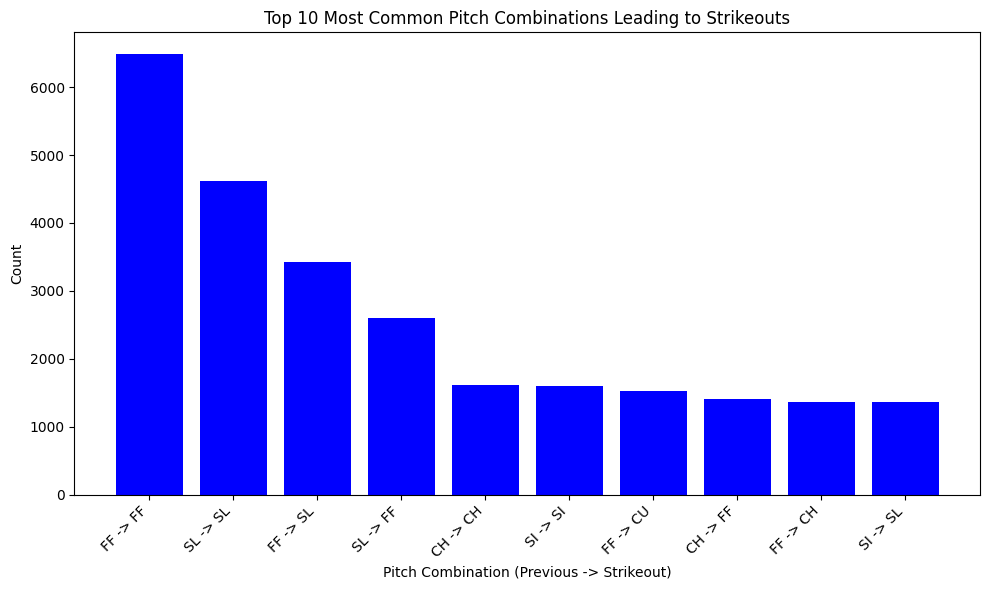

In [8]:
top_n = 10
top_pitch_pairs = most_common_pitch_pairs.head(top_n)

# Step 2: Create a bar chart
plt.figure(figsize=(10, 6))

# X-axis labels will be the combination of the previous pitch and strikeout pitch
pitch_combinations = top_pitch_pairs.apply(lambda row: f"{row['prev_pitchname']} -> {row['pitchname']}", axis=1)

# Plot the bar chart
plt.bar(pitch_combinations, top_pitch_pairs['count'], color='blue')

# Step 3: Label the chart
plt.title(f"Top {top_n} Most Common Pitch Combinations Leading to Strikeouts")
plt.xlabel('Pitch Combination (Previous -> Strikeout)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

In [6]:
season_22.head(20)

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,1,4.0,1,0.0,0.0,1.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,2,4.0,1,0.0,1.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,3,4.0,1,1.0,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,1,4.0,1,0.0,0.0,1.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,35,1,5.0,0,0.0,0.0,1.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
5,6,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,2,4.0,1,1.0,0.0,1.0,...,15.674111,7.154369,-0.638243,1.884003,115,Colorado Rockies,121,New York Mets,19,Coors Field
6,7,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,3,4.0,1,1.0,1.0,1.0,...,14.973265,8.511888,-1.296625,2.196844,115,Colorado Rockies,121,New York Mets,19,Coors Field
7,8,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,4,4.0,1,1.0,2.0,1.0,...,-1.077158,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field
8,9,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,33,1,4.0,1,0.0,0.0,2.0,...,12.063048,9.522058,-0.639474,2.198678,115,Colorado Rockies,121,New York Mets,19,Coors Field
9,10,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,33,2,4.0,1,0.0,1.0,2.0,...,4.873104,6.592208,0.492799,2.455150,115,Colorado Rockies,121,New York Mets,19,Coors Field


In [7]:
season_23.head()

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,1,4.0,1,0.0,0.0,1.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,2,4.0,1,0.0,1.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,3,4.0,1,1.0,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,1,4.0,1,0.0,0.0,1.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,35,1,5.0,0,0.0,0.0,1.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field


## All the dataframes are the same shape!

In [8]:
print(f"shape for 21: \n {season_21.shape}")
print(f"shape for 22: \n {season_22.shape}")
print(f"shape for 23: \n {season_23.shape}")

shape for 21: 
 (706909, 33)
shape for 22: 
 (706909, 31)
shape for 23: 
 (706909, 31)


In [9]:
print(f"unique for 21: \n {season_21.nunique()}")

unique for 21: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
Date                   183
Time                   107
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
dtype: int64


In [10]:
print(f"unique for 22: \n {season_22.nunique()}")

unique for 22: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
dtype: int64


In [11]:
print(f"unique for 23: \n {season_23.nunique()}")
# it seems like there are 2423 unique entries in each df 


unique for 23: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
dtype: int64


## Looking for duplicates 

In [12]:
duplicates = season_21.duplicated()
print(duplicates.sum())
duplicates = season_22.duplicated()
print(duplicates.sum())
duplicates = season_23.duplicated()
print(duplicates.sum())
# no duplicates lets go 

0
0
0


## Creating a barplot displaying the frequency of each pitch type for each pitch result 

In [13]:
grouped_data = season_21.groupby(['pitchresult', 'pitchname']).size().reset_index(name='count')

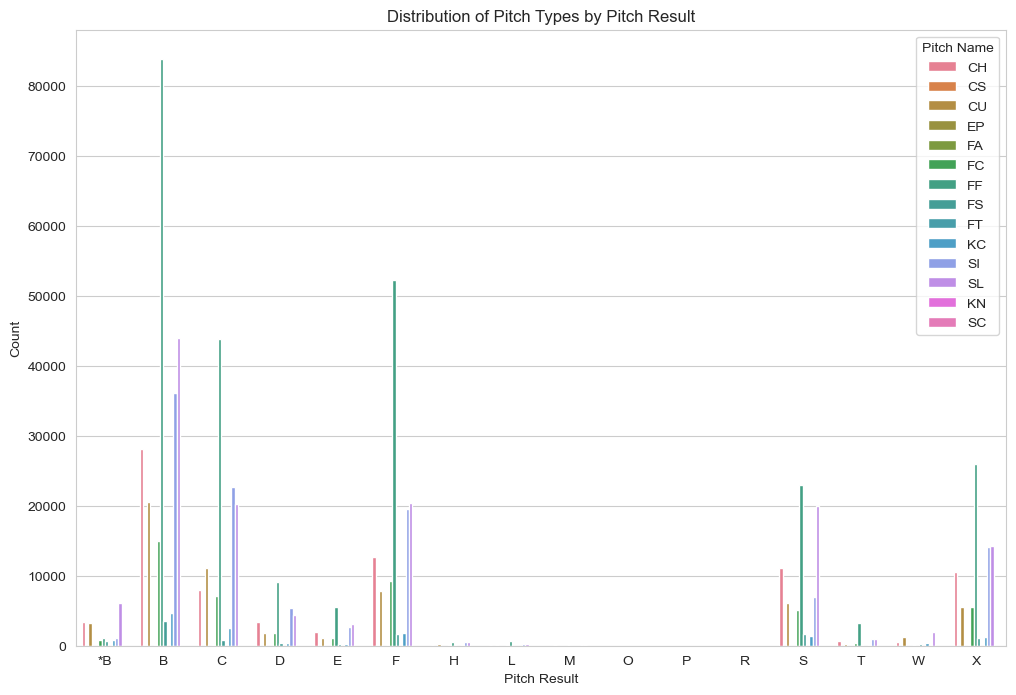

In [14]:
plt.figure(figsize=(12, 8))

# Making a barplot 
sns.barplot(x='pitchresult', y='count', hue='pitchname', data=grouped_data)

# Adding titles and labels
plt.title('Distribution of Pitch Types by Pitch Result')
plt.xlabel('Pitch Result')
plt.ylabel('Count')

plt.legend(title='Pitch Name')
plt.show()


## Showing what the Pitch Name and Pitch Result shorthands mean

In [15]:
# I have no idea what half the stuff means  
unique_pitch_results = season_21[['pitchresult', 'pitchresult_desc']].drop_duplicates()

unique_pitch_results

,pitchresult,pitchresult_desc
104858,B,Ball - Called
104859,F,Strike - Foul
104867,E,Hit Into Play - Run(s)
104870,X,Hit Into Play - Out(s)
104871,C,Strike - Called
104873,S,Strike - Swinging
104881,*B,Ball - Ball In Dirt
104891,D,Hit Into Play - No Out(s)
104939,L,Strike - Foul Bunt
105040,W,Strike - Swinging Blocked


In [16]:
# I have no idea what half the stuff means (but for pitchnames) 
unique_pitch_results = season_21[['pitchname', 'pitchname_desc']].drop_duplicates()

print(unique_pitch_results.size)

unique_pitch_results

46


,pitchname,pitchname_desc
104858,FF,Four-seam FB
104864,SI,Sinker
104867,CH,Changeup
104873,CU,Curveball
104878,SL,Slider
104884,KC,Knuckle Curve
104993,FC,Cutter
105143,FS,Splitter
107264,CS,Slow Curve
72849,SC,Screwball


In [17]:
cluster_df = season_22.groupby(['pitchname']).size().reset_index(name='count')
cluster_df

,pitchname,count
0,CH,80621
1,CS,175
2,CU,59540
3,EP,43
4,FA,425
5,FC,46567
6,FF,248968
7,FS,10364
8,FT,90
9,KC,13544


In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [19]:
features = ['relspeed', 'spinrate', 'horzbreak']
# I think that these three have different distributions & they are not all pos
scaler = StandardScaler()

season_21[features] = scaler.fit_transform(season_21[features])
X = season_21[features].dropna()

In [20]:
NA_rows = season_21[season_21.isna().any(axis=1)]
# we're looking at all the rows with NaN values - at first glance it seems as if there are ~1000 rows with no spinrate information 
NA_rows 

,Unnamed: 0,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
110770,110771,2021/04/01/clemlb-detmlb-1,2021-04-01 12:10:00,2021-04-01,12:10:00,8,1,1.0,1,0.0,...,0.755690,20.098146,-1.850928,4.340580,116,Detroit Tigers,114,Cleveland Indians,2394,Comerica Park
98726,98727,2021/04/01/atlmlb-phimlb-1,2021-04-01 15:05:00,2021-04-01,15:05:00,28,1,4.0,0,0.0,...,2.628132,11.244063,-0.840181,1.845386,143,Philadelphia Phillies,144,Atlanta Braves,2681,Citizens Bank Park
38695,38696,2021/04/09/anamlb-tormlb-1,2021-04-09 18:07:00,2021-04-09,18:07:00,2,1,1.0,0,0.0,...,-0.253684,-5.378897,0.869115,1.679699,141,Toronto Blue Jays,108,Los Angeles Angels,2536,TD Ballpark
37245,37246,2021/04/12/sdnmlb-pitmlb-1,2021-04-12 18:35:00,2021-04-12,18:35:00,13,1,2.0,1,0.0,...,-1.121925,-0.341119,0.429591,2.539548,134,Pittsburgh Pirates,135,San Diego Padres,31,PNC Park
84204,84205,2021/04/14/texmlb-tbamlb-1,2021-04-14 18:10:00,2021-04-14,18:10:00,5,7,1.0,1,3.0,...,1.388759,4.685384,-0.439610,1.817388,139,Tampa Bay Rays,140,Texas Rangers,12,Tropicana Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676708,676709,2021/10/01/anamlb-seamlb-1,2021-10-02 02:10:00,2021-10-02,02:10:00,16,1,2.0,1,0.0,...,1.048904,-4.830800,0.302855,2.228760,136,Seattle Mariners,108,Los Angeles Angels,680,T-Mobile Park
573907,573908,2021/10/01/anamlb-seamlb-1,2021-10-02 02:10:00,2021-10-02,02:10:00,25,2,3.0,1,0.0,...,1.093101,-5.599032,-0.028540,2.231985,136,Seattle Mariners,108,Los Angeles Angels,680,T-Mobile Park
597538,597539,2021/10/03/sdnmlb-sfnmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,49,4,6.0,0,1.0,...,1.077383,-4.349966,0.074179,2.327676,137,San Francisco Giants,135,San Diego Padres,2395,Oracle Park
538681,538682,2021/10/03/sdnmlb-sfnmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,68,3,8.0,0,0.0,...,0.277705,18.756428,-0.880793,2.034462,137,San Francisco Giants,135,San Diego Padres,2395,Oracle Park


In [21]:
X

,relspeed,spinrate,horzbreak
104858,-0.448342,2.242860,0.635511
104859,-0.267229,-0.865657,0.230494
104860,-0.116272,-0.931071,0.613479
104861,-0.391690,-0.907784,0.582069
104862,-0.376152,-0.891085,0.390726
...,...,...,...
563007,1.198345,-0.012950,0.073364
563008,-1.984833,1.334203,-0.594646
563009,1.338812,0.205684,-0.060115
565478,1.371707,0.405305,-0.070872


In [22]:
# Time to Cluster :) 
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [23]:
# Cluster assignments for each point 
X['cluster'] = kmeans.labels_

# Cluster centroids 
centroids = kmeans.cluster_centers_

In [24]:
# %matplotlib notebook

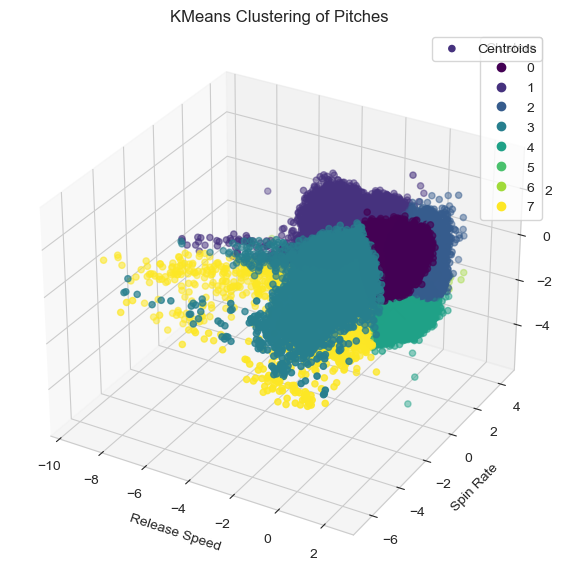

In [25]:
# Ensure that interactive mode is on
# plt.ion()  # Turns on interactive mode

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Give each cluster a diff color 
scatter = ax.scatter(X['relspeed'], X['spinrate'], X['horzbreak'], c=X['cluster'], cmap='viridis', marker='o')

# plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='x', label='Centroids')

# labels
ax.set_xlabel('Release Speed')
ax.set_ylabel('Spin Rate')
ax.set_zlabel('Horizontal Break')
ax.set_title('KMeans Clustering of Pitches')

# legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# legend for centroids
ax.legend(['Centroids'], loc='upper right')

# Show plot
plt.show()

# plt.pause(0.1)  # Small pause to keep the plot interactive

In [ ]:
# Calculate the silhouette score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')